# Simple Artificial Neural Network implementation with Keras



### THE MNIST database of handwritten digits <br>
##### The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.[3][4] It was created by "re-mixing" the samples from NIST's original datasets.
Source: http://yann.lecun.com/exdb/mnist/

### 1. Import the required libraries

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist # mnist dataset from keras
from keras.models import Sequential # to define a model
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils # to preprocess the data

## 2. Load the MNIST dataset

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


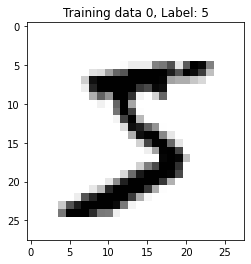

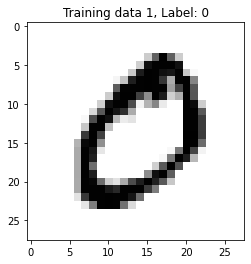

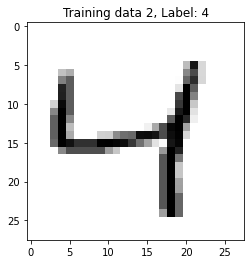

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Shape of the data
print('X_train shape: ', x_train.shape)
print('Y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('Y_test shape: ', y_test.shape)

# visualizin the MNIST data
# plot first few images
for i in range(3):
    image = x_train[i]
    label = y_train[i]
    plt.title("Training data %d, Label: %d"%(i, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# show the figure
plt.show() 

## 3. Data Preprocessing - reshaping and rescaling.

In [3]:
# Flattening the data
# (28, 28) - 2D; (784) - 1D
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Rescaling
x_train /= 255
x_test /= 255

print("Training matrix shape: ", x_train.shape)
print("Testing matrix shape: ", x_test.shape)

Training matrix shape:  (60000, 784)
Testing matrix shape:  (10000, 784)


#### Converting the target values into categorical values

In [4]:
# One Hot Encoding of labels
print("Shape of y_train before encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print("Shape of y_train after One Hot encoding: ", y_train.shape)

Shape of y_train before encoding:  (60000,)
Shape of y_train after One Hot encoding:  (60000, 10)


## 4. Build and train the model

In [5]:
# Building the model
def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

model = build_model()

In [6]:
# Model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [7]:
# Compiling the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train,
         batch_size=128,
         epochs=5,
         validation_data=(x_test, y_test),
         verbose=1)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4739 - accuracy: 0.8564 - val_loss: 0.1999 - val_accuracy: 0.9397
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2340 - accuracy: 0.9299 - val_loss: 0.1446 - val_accuracy: 0.9569
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1872 - accuracy: 0.9444 - val_loss: 0.1239 - val_accuracy: 0.9634
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1572 - accuracy: 0.9521 - val_loss: 0.1084 - val_accuracy: 0.9679
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1401 - accuracy: 0.9579 - val_loss: 0.1057 - val_accuracy: 0.9677


## 5. Model metrics

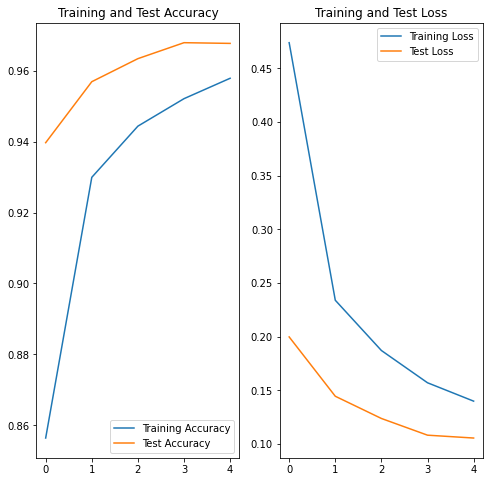

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(0, 5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

In [10]:
# Comparing the predicted and actual results
score = model.evaluate(x_test, y_test, batch_size=32, verbose=1, sample_weight=None)
print("Test Accuracy %:", score[1]*100)

313/313 [==============================] - 0s 851us/step - loss: 0.1057 - accuracy: 0.9677
Test Accuracy %: 96.77000045776367
